# Recommendation System

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity


In [2]:

# Load datasets
ratings = pd.read_csv(r'C:\Users\manis\OneDrive\Desktop\CODSOFT\ratings.csv')
movies = pd.read_csv(r'C:\Users\manis\OneDrive\Desktop\CODSOFT\Recommendation system\movies.csv')


In [3]:
# Merge ratings with movie titles
ratings = pd.merge(ratings, movies, on='movieId')


In [4]:

# Pivot the ratings dataframe to create a user-item matrix
user_item_matrix = ratings.pivot(index='userId', columns='title', values='rating').fillna(0)


In [5]:

# Compute the cosine similarity matrix
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)


In [6]:

def get_recommendations(user_id, user_item_matrix, user_similarity_df, k=5):
    # Get the user's ratings
    user_ratings = user_item_matrix.loc[user_id]
    
    # Compute the weighted sum of ratings from similar users
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)[1:k+1]
    weighted_ratings = np.dot(similar_users, user_item_matrix.loc[similar_users.index]) / similar_users.sum()
    
    # Recommend movies that the user has not rated yet
    recommendations = pd.Series(weighted_ratings, index=user_item_matrix.columns)
    recommendations = recommendations[user_ratings == 0]
    
    return recommendations.sort_values(ascending=False).head(k)


In [11]:

# Get recommendations for a user
user_id = 1
recommendations = get_recommendations(user_id, user_item_matrix, user_similarity_df, k=5)
print(f"Top 5 recommendations for user {user_id}:")
print(recommendations)

Top 5 recommendations for user 1:
title
Jumanji (1995)                        2.733447
Father of the Bride Part II (1995)    0.763727
Waiting to Exhale (1995)              0.000000
dtype: float64


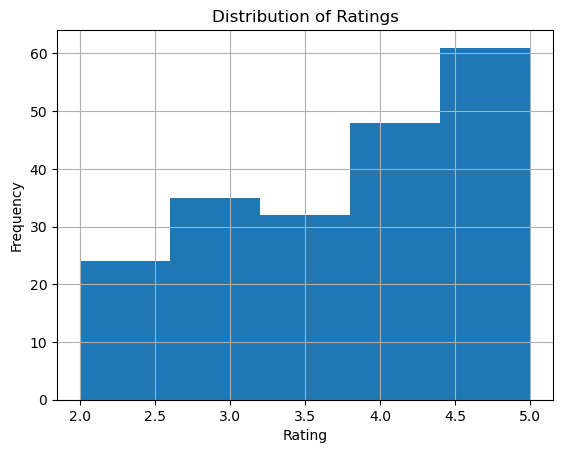

In [12]:
import matplotlib.pyplot as plt

# Histogram of ratings
ratings['rating'].hist(bins=5)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()


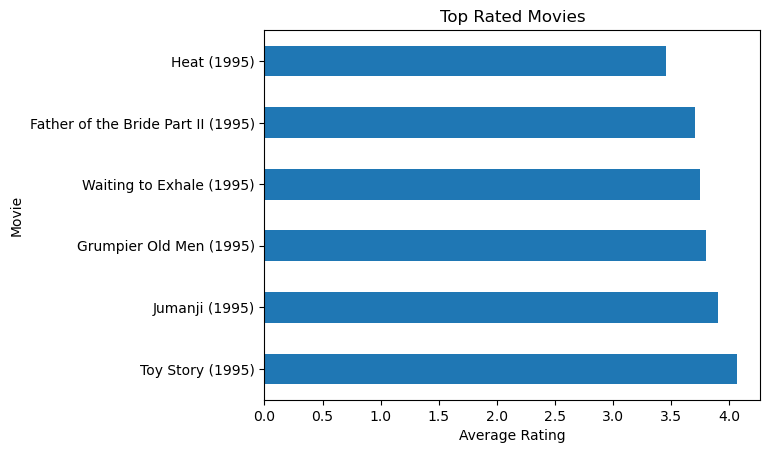

In [13]:
# Calculate average ratings for each movie
average_ratings = ratings.groupby('title')['rating'].mean().sort_values(ascending=False)

# Bar chart of top rated movies
top_rated = average_ratings.head(10)
top_rated.plot(kind='barh')
plt.xlabel('Average Rating')
plt.ylabel('Movie')
plt.title('Top Rated Movies')
plt.show()


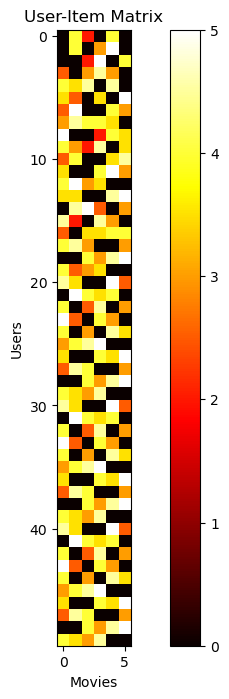

In [16]:
# Heatmap of user-item matrix
plt.figure(figsize=(10, 8))
plt.imshow(user_item_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xlabel('Movies')
plt.ylabel('Users')
plt.title('User-Item Matrix')
plt.show()


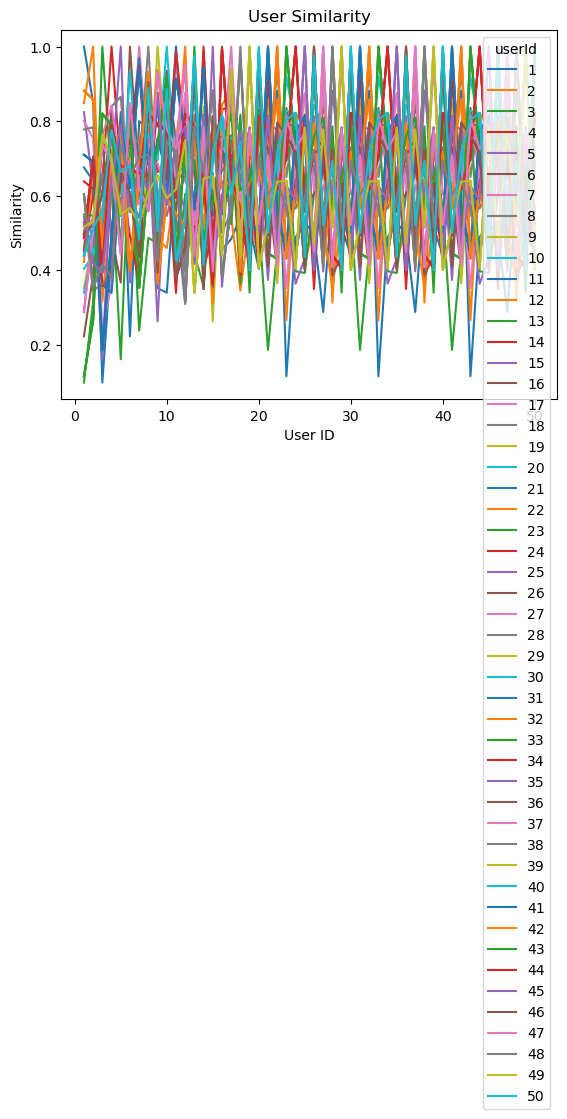

In [17]:
# Line chart of user similarity
user_similarity_df.plot(kind='line')
plt.xlabel('User ID')
plt.ylabel('Similarity')
plt.title('User Similarity')
plt.show()


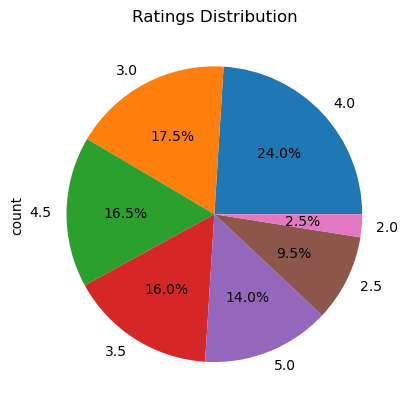

In [18]:
# Pie chart of ratings distribution
ratings_distribution = ratings['rating'].value_counts()
ratings_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Ratings Distribution')
plt.show()


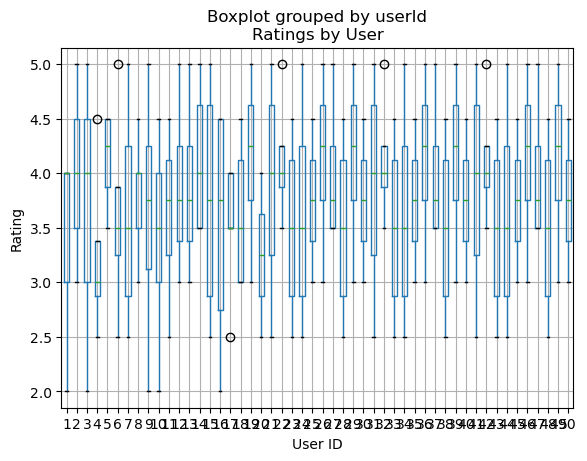

In [19]:
# Box plot of ratings by user
ratings.boxplot(column='rating', by='userId')
plt.xlabel('User ID')
plt.ylabel('Rating')
plt.title('Ratings by User')
plt.show()


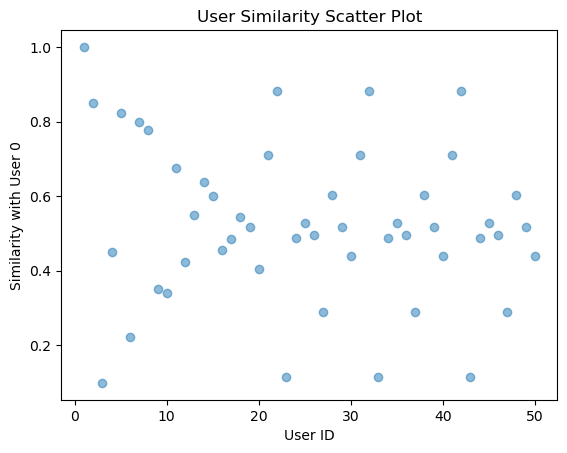

In [20]:
# Scatter plot of user similarity
plt.scatter(user_similarity_df.index, user_similarity_df.iloc[:, 0], alpha=0.5)
plt.xlabel('User ID')
plt.ylabel('Similarity with User 0')
plt.title('User Similarity Scatter Plot')
plt.show()


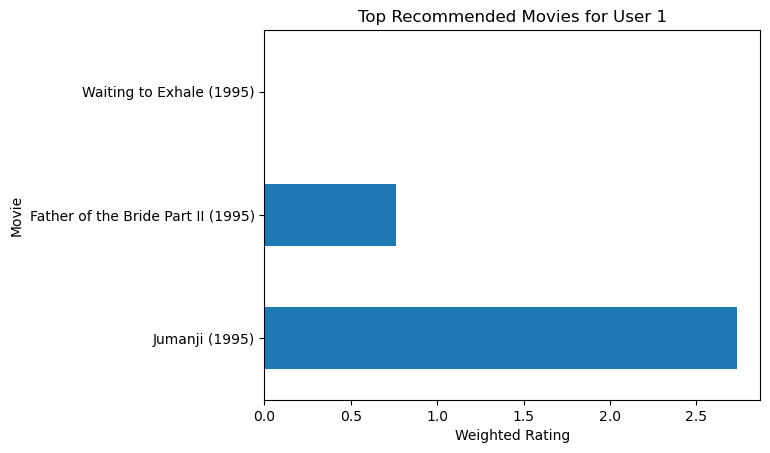

In [21]:
# Get recommendations for a user
user_id = 1
recommendations = get_recommendations(user_id, user_item_matrix, user_similarity_df, k=5)

# Bar chart of top recommended movies
recommendations.plot(kind='barh')
plt.xlabel('Weighted Rating')
plt.ylabel('Movie')
plt.title(f'Top Recommended Movies for User {user_id}')
plt.show()


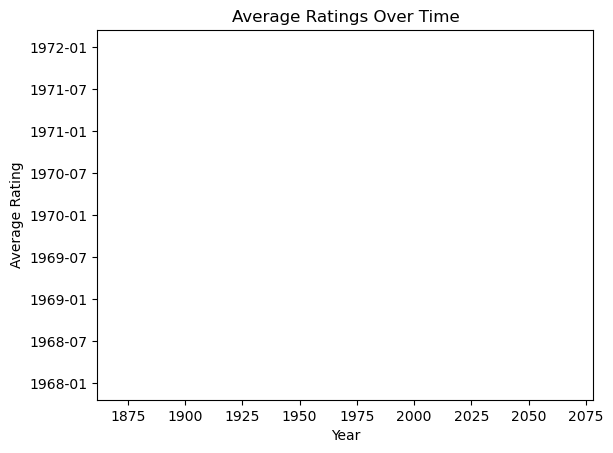

In [28]:
# Convert timestamp to datetime
ratings['movieId'] = pd.to_datetime(ratings['movieId'], unit='s')

# Line chart of average ratings over time
average_ratings_over_time = ratings.groupby(ratings['movieId'].dt.year)['rating'].mean()
average_ratings_over_time.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Ratings Over Time')
plt.show()


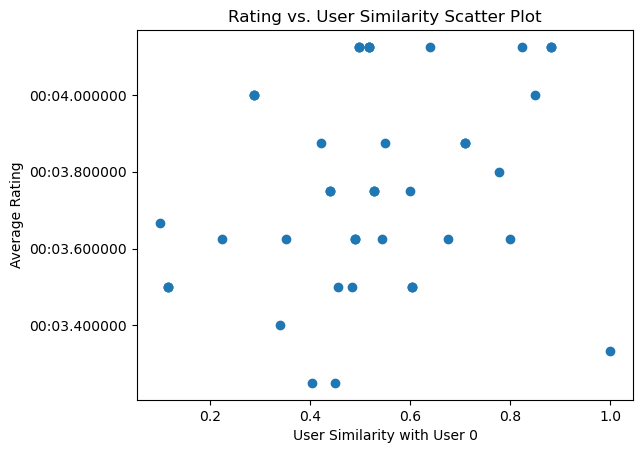

In [29]:
# Scatter plot of rating vs. user similarity
plt.scatter(user_similarity_df.iloc[:, 0], ratings.groupby('userId')['rating'].mean())
plt.xlabel('User Similarity with User 0')
plt.ylabel('Average Rating')
plt.title('Rating vs. User Similarity Scatter Plot')
plt.show()
